In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['TPR','TNR','FPR','FNR','AUC','G-Mean','F1', 'G-Measure']
report = pd.DataFrame(columns = column_names)
columns = ['id',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento',
 'Precio_cat']
columns_test = ['id',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento']
seed = 2232527064

In [3]:
import math

def cmdata_report(cm, classifier, data):# add a df as parameter
    total = cm.sum()
    TP = cm[0,0]
    FN = cm[0,1]
    FP = cm[1,0]
    TN = cm[1,1]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    ratio = (cm[0,0]+cm[1,1])/total
    PPV = TP/(TP+FP)
    AUC = (1 + TPR - FPR)/2
    GMEAN = math.sqrt(TNR*TPR)
    F1 = 2*TP/(2*TP+FP+FN)
    GMEASURE = math.sqrt(PPV*TPR)
    
    s = pd.Series([TPR,TNR,FPR,FNR,AUC,GMEAN,F1,GMEASURE], name=classifier, index=report.columns)
    df = data.append(s)
    return df

In [4]:
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [5]:
train = pd.read_csv("../csv/train.csv", na_values='?')
test = pd.read_csv("../csv/test.csv", na_values='?')

train = train[columns].copy()
test = test[columns_test].copy()
print(test.shape)

(1159, 10)


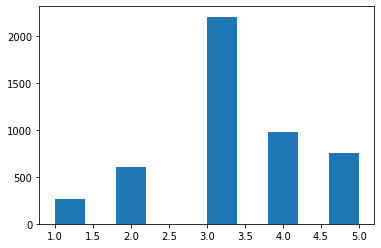

Class: 3, ocurrences: 2211 -> 45.88088815106869%
Class: 4, ocurrences: 978 -> 20.29466694334924%
Class: 5, ocurrences: 759 -> 15.750155633948951%
Class: 2, ocurrences: 602 -> 12.492218302552397%
Class: 1, ocurrences: 269 -> 5.582070969080722%


In [6]:
import matplotlib.pyplot as plt

plt.hist(train['Precio_cat'])
plt.show()

classes = train['Precio_cat'].value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")

initial_n = len(train['Precio_cat'].index)

In [7]:
cols = train.columns.tolist()
print(cols)

['id', 'Año', 'Kilometros', 'Combustible', 'Mano', 'Consumo', 'Motor_CC', 'Potencia', 'Asientos', 'Descuento', 'Precio_cat']


In [8]:
cols = train.columns.tolist()
for i in cols:
    print(i)
    print(train[i].unique())

id
[1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Año
[2012. 2016. 2013. 2017. 2009. 2014. 2011. 2015. 2008. 2010. 2018. 2006.
   nan 2019. 2005. 2007. 2003. 2004. 2001. 1998. 2002. 2000. 1999.]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible
['Diesel' 'Petrol' nan 'CNG' 'LPG' 'Electric']
Mano
['First' 'Second' 'Third' nan 'Fourth & Above']
Consumo
['23.4 kmpl' '20.51 kmpl' '25.32 kmpl' '18.5 kmpl' '18.7 kmpl' '17.8 kmpl'
 '16.8 kmpl' '18.6 kmpl' '25.2 kmpl' '10.91 kmpl' '12.99 kmpl' '17.5 kmpl'
 '25.8 kmpl' '18.25 kmpl' '10.0 kmpl' '11.5 kmpl' '19.1 kmpl' '14.21 kmpl'
 '14.16 kmpl' '17.43 kmpl' '18.0 kmpl' '15.7 kmpl' '16.0 kmpl'
 '21.43 kmpl' '21.64 kmpl' '20.73 kmpl' '14.0 kmpl' '17.9 kmpl'
 '28.4 kmpl' '15.96 kmpl' nan '23.65 kmpl' '20.36 kmpl' '21.9 kmpl'
 '22.95 kmpl' '23.59 kmpl' '17.57 kmpl' '21.27 kmpl' '17.3 kmpl'
 '22.32 kmpl' '18.9 kmpl' '24.7 kmpl' '24.0 kmpl' '11.0 kmpl' '13.0 kmpl'
 '16.47 kmpl' '17.21 kmpl' '13.6 kmpl' '26.59 km

In [9]:
train.head()

,id,Año,Kilometros,Combustible,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,2012.0,83000.0,Diesel,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,3
1,2.0,2016.0,4800.0,Petrol,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3
2,3.0,2016.0,26000.0,Diesel,First,25.32 kmpl,1198 CC,77 bhp,6.0,NaN,3
3,4.0,2013.0,56127.0,Petrol,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,3
4,5.0,2017.0,41981.0,Petrol,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,3


# Preprocessing data

First of all, we get all numbers from string format

In [10]:
train['Descuento'] = train['Descuento'].fillna(0)
test['Descuento'] = test['Descuento'].fillna(0)

train['Combustible'].fillna(value=train['Combustible'].value_counts().index[0],inplace =True)
train['Mano'].fillna(value=train['Mano'].value_counts().index[0],inplace =True)

In [11]:
train['Combustible'].value_counts(dropna=False)

Diesel      2618
Petrol      2151
CNG           42
LPG            7
Electric       1
Name: Combustible, dtype: int64

In [12]:
import re
import math

for index, row in train.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        train.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        train.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        train.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
for index, row in test.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        test.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        test.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        test.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
train['Consumo'] = train['Consumo'].astype(float)
train['Motor_CC'] = train['Motor_CC'].astype(float)
train['Potencia'] = train['Potencia'].astype(float)

test['Consumo'] = test['Consumo'].astype(float)
test['Motor_CC'] = test['Motor_CC'].astype(float)
test['Potencia'] = test['Potencia'].astype(float)

train.head()

,id,Año,Kilometros,Combustible,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,2012.0,83000.0,Diesel,First,23.40,1248.0,74.0,5.0,0.0,3
1,2.0,2016.0,4800.0,Petrol,First,20.51,998.0,67.0,5.0,0.0,3
2,3.0,2016.0,26000.0,Diesel,First,25.32,1198.0,77.0,6.0,0.0,3
3,4.0,2013.0,56127.0,Petrol,First,18.50,1197.0,80.0,5.0,0.0,3
4,5.0,2017.0,41981.0,Petrol,First,18.70,1199.0,88.0,5.0,0.0,3


In [13]:
from sklearn import preprocessing
le_combustible = preprocessing.LabelEncoder()
le_mano = preprocessing.LabelEncoder()

data = train.copy()
#data_without_nan = data_without_nan.dropna()
data['Combustible'] = le_combustible.fit_transform(data['Combustible'])
data['Mano'] = le_mano.fit_transform(data['Mano'])
#imputer_num = SimpleImputer(missing_values=np.NaN, strategy='mean')
#data_without_nan.Año = imputer_num.fit_transform(data_without_nan.Año.values.reshape(-1,1))[:,0]
#data_without_nan.Año = imputer_num.fit_transform(data_without_nan.Año.values.reshape(-1,1))[:,0]
cols1 = data.select_dtypes([np.number]).columns
cols2 = data.select_dtypes(exclude = [np.number]).columns
data[cols1] = data[cols1].fillna(data[cols1].mean())
data[cols2] = data[cols2].fillna(data[cols2].mode().iloc[0])

test['Combustible'] = le_combustible.fit_transform(test['Combustible'])
test['Mano'] = le_mano.fit_transform(test['Mano'])

In [14]:
data.head()

,id,Año,Kilometros,Combustible,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,2012.0,83000.0,1,0,23.40,1248.0,74.0,5.0,0.0,3
1,2.0,2016.0,4800.0,4,0,20.51,998.0,67.0,5.0,0.0,3
2,3.0,2016.0,26000.0,1,0,25.32,1198.0,77.0,6.0,0.0,3
3,4.0,2013.0,56127.0,4,0,18.50,1197.0,80.0,5.0,0.0,3
4,5.0,2017.0,41981.0,4,0,18.70,1199.0,88.0,5.0,0.0,3


In [15]:
cols = data.columns.tolist()
for i in cols:
    print(i)
    print(data[i].unique())

id
[1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Año
[2012.         2016.         2013.         2017.         2009.
 2014.         2011.         2015.         2008.         2010.
 2018.         2006.         2013.57109754 2019.         2005.
 2007.         2003.         2004.         2001.         1998.
 2002.         2000.         1999.        ]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible
[1 4 0 3 2]
Mano
[0 2 3 1]
Consumo
[23.4        20.51       25.32       18.5        18.7        17.8
 16.8        18.6        25.2        10.91       12.99       17.5
 25.8        18.25       10.         11.5        19.1        14.21
 14.16       17.43       18.         15.7        16.         21.43
 21.64       20.73       14.         17.9        28.4        15.96
 18.25417615 23.65       20.36       21.9        22.95       23.59
 17.57       21.27       17.3        22.32       18.9        24.7
 24.         11.         13.         16.47       17.21     

# erase all missing data

In [16]:
#data_without_nan = data_without_nan.drop('Tipo_marchas', axis=1).drop('Nombre', axis=1).drop('id', axis=1).drop('Ciudad', axis=1)
test_id = test.id
#test = test.drop('Tipo_marchas', axis=1).drop('Nombre', axis=1).drop('id', axis=1).drop('Ciudad', axis=1)
#target = data.Precio_cat
data = data.drop('id', axis=1)
test = test.drop('id', axis=1)

X = data.drop('Precio_cat', axis=1)
y = data['Precio_cat']


In [17]:
'''import smote_variants as sv
oversampler = sv.MSMOTE(random_state=seed)
X_, y_ = sv.MulticlassOversampling(
    oversampler=oversampler, 
    strategy='eq_1_vs_many_successive').sample(X.to_numpy(), y.to_numpy())

X = pd.DataFrame(data=X_, columns=X.columns)
y = pd.Series(y_, name=y.name)
'''
target = y

Now, train the model

In [18]:
import random
# get random seed parameter for classifiers
#random_seed = random.randrange(2**32 - 1)
#seed = random_seed
# seed used at kaggle submission
#seed = 2232527064
#print("random_seed: "+str(random_seed))
from sklearn.model_selection import StratifiedKFold
cv_ = StratifiedKFold(n_splits=5, shuffle=True)
print("Actual seed: "+str(seed))

Actual seed: 2232527064


In [19]:
#from mlxtend.classifier import StackingCVClassifier

In [20]:
from imblearn.under_sampling import CondensedNearestNeighbour
undersample = CondensedNearestNeighbour(n_neighbors=1)
X, y = undersample.fit_resample(X, y)

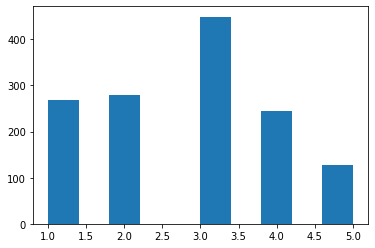

Class: 3, ocurrences: 449 -> 32.77372262773723%
Class: 2, ocurrences: 280 -> 20.437956204379564%
Class: 1, ocurrences: 269 -> 19.635036496350363%
Class: 4, ocurrences: 245 -> 17.88321167883212%
Class: 5, ocurrences: 127 -> 9.27007299270073%


In [21]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.show()

classes = y.value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")

initial_n = len(train['Precio_cat'].index)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.transform(test)

In [23]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier  
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


'''estimators = [
    ('lr', LogisticRegression(random_state=seed, multi_class='ovr', solver='liblinear', C=1)),
    ('gbc', GradientBoostingClassifier(random_state=seed)),
    ('rf1', RandomForestClassifier(random_state=seed, n_estimators=200, criterion='gini')),
    ('rf2', RandomForestClassifier(random_state=seed, n_estimators=200, criterion='entropy')),
    ('et1', ExtraTreesClassifier(random_state=seed, n_estimators=200, criterion='gini')),
    ('et2', ExtraTreesClassifier(random_state=seed, n_estimators=200, criterion='entropy')),
    ('lgb', lgb.LGBMClassifier(random_state=seed, n_jobs=-1)),
    ('nn', MLPClassifier(random_state=seed))
    ]'''
estimators = [
    ('lr', LogisticRegression(random_state=seed, multi_class='ovr', solver='liblinear', C=1)),
    ('gbc', GradientBoostingClassifier(random_state=seed)),
    ('rf2', RandomForestClassifier(random_state=seed, criterion='entropy')),
    ('et1', ExtraTreesClassifier(random_state=seed)),
    ('nn', MLPClassifier(random_state=seed))
    ]

#final_est = RandomForestClassifier(random_state=seed)
final_est = CatBoostClassifier(random_state=seed)
#final_est = lgb.LGBMClassifier(random_state=seed, n_jobs=-1)
clf = StackingClassifier(
    estimators=estimators, final_estimator=final_est,cv=cv_
    )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=seed
    )
#print(clf.fit(X_train, y_train).score(X_test, y_test))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
rf_cmatrix = confusion_matrix(y_test, y_pred)
rf_report = get_classification_report(y_test, y_pred)
report = cmdata_report(rf_cmatrix, 'stacking', report)

/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

Learning rate set to 0.079234
0:	learn: 1.5031624	total: 58.7ms	remaining: 58.6s
1:	learn: 1.4097082	total: 68.9ms	remaining: 34.4s
2:	learn: 1.3332097	total: 80ms	remaining: 26.6s
3:	learn: 1.2649673	total: 91.5ms	remaining: 22.8s
4:	learn: 1.2073261	total: 102ms	remaining: 20.2s
5:	learn: 1.1623879	total: 113ms	remaining: 18.7s
6:	learn: 1.1193616	total: 124ms	remaining: 17.6s
7:	learn: 1.0798324	total: 135ms	remaining: 16.7s
8:	learn: 1.0463896	total: 146ms	remaining: 16.1s
9:	learn: 1.0165434	total: 157ms	remaining: 15.6s
10:	learn: 0.9887384	total: 167ms	remaining: 15s
11:	learn: 0.9609338	total: 178ms	remaining: 14.7s
12:	learn: 0.9365806	total: 190ms	remaining: 14.4s
13:	learn: 0.9156402	total: 205ms	remaining: 14.4s
14:	learn: 0.8954789	total: 217ms	remaining: 14.2s
15:	learn: 0.8762787	total: 230ms	remaining: 14.2s
16:	learn: 0.8602978	total: 242ms	remaining: 14s
17:	learn: 0.8444834	total: 255ms	remaining: 13.9s
18:	learn: 0.8298241	total: 266ms	remaining: 13.7s
19:	learn: 0.

170:	learn: 0.4362528	total: 2.04s	remaining: 9.91s
171:	learn: 0.4348151	total: 2.06s	remaining: 9.91s
172:	learn: 0.4339838	total: 2.07s	remaining: 9.89s
173:	learn: 0.4328269	total: 2.08s	remaining: 9.87s
174:	learn: 0.4314588	total: 2.09s	remaining: 9.85s
175:	learn: 0.4299436	total: 2.1s	remaining: 9.83s
176:	learn: 0.4292014	total: 2.11s	remaining: 9.81s
177:	learn: 0.4277053	total: 2.12s	remaining: 9.8s
178:	learn: 0.4263866	total: 2.13s	remaining: 9.78s
179:	learn: 0.4256497	total: 2.14s	remaining: 9.75s
180:	learn: 0.4242285	total: 2.15s	remaining: 9.74s
181:	learn: 0.4231385	total: 2.17s	remaining: 9.73s
182:	learn: 0.4222425	total: 2.18s	remaining: 9.72s
183:	learn: 0.4213447	total: 2.19s	remaining: 9.71s
184:	learn: 0.4199391	total: 2.2s	remaining: 9.71s
185:	learn: 0.4185066	total: 2.21s	remaining: 9.69s
186:	learn: 0.4172231	total: 2.22s	remaining: 9.67s
187:	learn: 0.4160534	total: 2.23s	remaining: 9.65s
188:	learn: 0.4148047	total: 2.25s	remaining: 9.64s
189:	learn: 0.4

340:	learn: 0.2852208	total: 4.09s	remaining: 7.91s
341:	learn: 0.2846293	total: 4.1s	remaining: 7.89s
342:	learn: 0.2838214	total: 4.11s	remaining: 7.88s
343:	learn: 0.2831014	total: 4.12s	remaining: 7.87s
344:	learn: 0.2824496	total: 4.13s	remaining: 7.85s
345:	learn: 0.2817457	total: 4.14s	remaining: 7.83s
346:	learn: 0.2808165	total: 4.15s	remaining: 7.82s
347:	learn: 0.2802034	total: 4.17s	remaining: 7.8s
348:	learn: 0.2795282	total: 4.17s	remaining: 7.79s
349:	learn: 0.2789290	total: 4.19s	remaining: 7.78s
350:	learn: 0.2786099	total: 4.2s	remaining: 7.76s
351:	learn: 0.2781668	total: 4.21s	remaining: 7.75s
352:	learn: 0.2774015	total: 4.22s	remaining: 7.73s
353:	learn: 0.2769316	total: 4.23s	remaining: 7.71s
354:	learn: 0.2764798	total: 4.24s	remaining: 7.7s
355:	learn: 0.2757427	total: 4.25s	remaining: 7.68s
356:	learn: 0.2751685	total: 4.26s	remaining: 7.67s
357:	learn: 0.2747254	total: 4.27s	remaining: 7.66s
358:	learn: 0.2742458	total: 4.29s	remaining: 7.65s
359:	learn: 0.27

514:	learn: 0.1993663	total: 5.93s	remaining: 5.58s
515:	learn: 0.1990625	total: 5.94s	remaining: 5.57s
516:	learn: 0.1985832	total: 5.95s	remaining: 5.56s
517:	learn: 0.1982008	total: 5.96s	remaining: 5.55s
518:	learn: 0.1977897	total: 5.97s	remaining: 5.53s
519:	learn: 0.1974767	total: 5.98s	remaining: 5.52s
520:	learn: 0.1970555	total: 5.99s	remaining: 5.51s
521:	learn: 0.1966485	total: 6s	remaining: 5.5s
522:	learn: 0.1962401	total: 6.01s	remaining: 5.49s
523:	learn: 0.1957954	total: 6.02s	remaining: 5.47s
524:	learn: 0.1953300	total: 6.03s	remaining: 5.46s
525:	learn: 0.1949238	total: 6.04s	remaining: 5.45s
526:	learn: 0.1946702	total: 6.05s	remaining: 5.43s
527:	learn: 0.1943707	total: 6.07s	remaining: 5.42s
528:	learn: 0.1938859	total: 6.08s	remaining: 5.41s
529:	learn: 0.1936051	total: 6.09s	remaining: 5.4s
530:	learn: 0.1932839	total: 6.1s	remaining: 5.38s
531:	learn: 0.1927880	total: 6.11s	remaining: 5.37s
532:	learn: 0.1923576	total: 6.12s	remaining: 5.36s
533:	learn: 0.1919

689:	learn: 0.1474881	total: 7.75s	remaining: 3.48s
690:	learn: 0.1472969	total: 7.77s	remaining: 3.47s
691:	learn: 0.1469967	total: 7.78s	remaining: 3.46s
692:	learn: 0.1467214	total: 7.79s	remaining: 3.45s
693:	learn: 0.1464518	total: 7.8s	remaining: 3.44s
694:	learn: 0.1461806	total: 7.82s	remaining: 3.43s
695:	learn: 0.1458858	total: 7.83s	remaining: 3.42s
696:	learn: 0.1457733	total: 7.84s	remaining: 3.41s
697:	learn: 0.1456061	total: 7.85s	remaining: 3.4s
698:	learn: 0.1454103	total: 7.86s	remaining: 3.38s
699:	learn: 0.1451116	total: 7.87s	remaining: 3.37s
700:	learn: 0.1448354	total: 7.88s	remaining: 3.36s
701:	learn: 0.1446891	total: 7.89s	remaining: 3.35s
702:	learn: 0.1445073	total: 7.9s	remaining: 3.34s
703:	learn: 0.1441348	total: 7.91s	remaining: 3.33s
704:	learn: 0.1439176	total: 7.92s	remaining: 3.31s
705:	learn: 0.1435602	total: 7.93s	remaining: 3.3s
706:	learn: 0.1434698	total: 7.94s	remaining: 3.29s
707:	learn: 0.1432172	total: 7.95s	remaining: 3.28s
708:	learn: 0.14

859:	learn: 0.1143492	total: 9.6s	remaining: 1.56s
860:	learn: 0.1142484	total: 9.61s	remaining: 1.55s
861:	learn: 0.1140033	total: 9.63s	remaining: 1.54s
862:	learn: 0.1139282	total: 9.64s	remaining: 1.53s
863:	learn: 0.1137541	total: 9.65s	remaining: 1.52s
864:	learn: 0.1136584	total: 9.66s	remaining: 1.51s
865:	learn: 0.1134537	total: 9.67s	remaining: 1.5s
866:	learn: 0.1133378	total: 9.68s	remaining: 1.49s
867:	learn: 0.1132035	total: 9.69s	remaining: 1.47s
868:	learn: 0.1130914	total: 9.7s	remaining: 1.46s
869:	learn: 0.1128797	total: 9.71s	remaining: 1.45s
870:	learn: 0.1126012	total: 9.72s	remaining: 1.44s
871:	learn: 0.1125033	total: 9.73s	remaining: 1.43s
872:	learn: 0.1124062	total: 9.74s	remaining: 1.42s
873:	learn: 0.1123187	total: 9.75s	remaining: 1.41s
874:	learn: 0.1121894	total: 9.76s	remaining: 1.39s
875:	learn: 0.1120443	total: 9.78s	remaining: 1.38s
876:	learn: 0.1119359	total: 9.78s	remaining: 1.37s
877:	learn: 0.1118379	total: 9.79s	remaining: 1.36s
878:	learn: 0.1

/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [24]:
report

,TPR,TNR,FPR,FNR,AUC,G-Mean,F1,G-Measure
stacking,0.80303,0.8,0.2,0.19697,0.801515,0.801514,0.821705,0.821928


In [25]:
rf_report

,precision,recall,f1-score,support
1,0.803030,0.791045,0.796992,67.000000
5,0.884615,0.718750,0.793103,32.000000
3,0.717742,0.787611,0.751055,113.000000
macro avg,0.751648,0.724586,0.735474,343.000000
accuracy,0.731778,0.731778,0.731778,0.731778
weighted avg,0.733371,0.731778,0.730644,343.000000
4,0.707692,0.754098,0.730159,61.000000
2,0.645161,0.571429,0.606061,70.000000


And get the prediction

In [26]:
target.head()

0    3
1    3
2    3
3    3
4    3
Name: Precio_cat, dtype: int64

In [28]:
clf.fit(X, y)
prediction = clf.predict(test)

/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

Learning rate set to 0.080407
0:	learn: 1.4854488	total: 10.7ms	remaining: 10.7s
1:	learn: 1.3853864	total: 22.2ms	remaining: 11.1s
2:	learn: 1.3021497	total: 33.4ms	remaining: 11.1s
3:	learn: 1.2335147	total: 44.4ms	remaining: 11.1s
4:	learn: 1.1753113	total: 56ms	remaining: 11.1s
5:	learn: 1.1271606	total: 68.4ms	remaining: 11.3s
6:	learn: 1.0799310	total: 80.1ms	remaining: 11.4s
7:	learn: 1.0402413	total: 90.9ms	remaining: 11.3s
8:	learn: 1.0062390	total: 103ms	remaining: 11.3s
9:	learn: 0.9754729	total: 114ms	remaining: 11.3s
10:	learn: 0.9467122	total: 124ms	remaining: 11.2s
11:	learn: 0.9191605	total: 135ms	remaining: 11.1s
12:	learn: 0.8964658	total: 147ms	remaining: 11.1s
13:	learn: 0.8749278	total: 158ms	remaining: 11.1s
14:	learn: 0.8564567	total: 169ms	remaining: 11.1s
15:	learn: 0.8397005	total: 182ms	remaining: 11.2s
16:	learn: 0.8233994	total: 192ms	remaining: 11.1s
17:	learn: 0.8085744	total: 206ms	remaining: 11.3s
18:	learn: 0.7947858	total: 217ms	remaining: 11.2s
19:	l

171:	learn: 0.4617198	total: 2.05s	remaining: 9.89s
172:	learn: 0.4600961	total: 2.07s	remaining: 9.88s
173:	learn: 0.4589399	total: 2.08s	remaining: 9.87s
174:	learn: 0.4583257	total: 2.09s	remaining: 9.85s
175:	learn: 0.4574053	total: 2.1s	remaining: 9.84s
176:	learn: 0.4562997	total: 2.12s	remaining: 9.85s
177:	learn: 0.4547134	total: 2.14s	remaining: 9.88s
178:	learn: 0.4536496	total: 2.15s	remaining: 9.87s
179:	learn: 0.4528712	total: 2.16s	remaining: 9.85s
180:	learn: 0.4520156	total: 2.17s	remaining: 9.83s
181:	learn: 0.4511419	total: 2.18s	remaining: 9.81s
182:	learn: 0.4502316	total: 2.19s	remaining: 9.8s
183:	learn: 0.4492572	total: 2.21s	remaining: 9.78s
184:	learn: 0.4485103	total: 2.22s	remaining: 9.77s
185:	learn: 0.4471731	total: 2.23s	remaining: 9.76s
186:	learn: 0.4464895	total: 2.24s	remaining: 9.75s
187:	learn: 0.4451112	total: 2.26s	remaining: 9.75s
188:	learn: 0.4442435	total: 2.27s	remaining: 9.75s
189:	learn: 0.4436537	total: 2.28s	remaining: 9.74s
190:	learn: 0.

333:	learn: 0.3380505	total: 3.91s	remaining: 7.79s
334:	learn: 0.3373338	total: 3.92s	remaining: 7.78s
335:	learn: 0.3362527	total: 3.94s	remaining: 7.78s
336:	learn: 0.3358746	total: 3.95s	remaining: 7.77s
337:	learn: 0.3354083	total: 3.96s	remaining: 7.76s
338:	learn: 0.3351139	total: 3.98s	remaining: 7.75s
339:	learn: 0.3346863	total: 3.99s	remaining: 7.74s
340:	learn: 0.3340239	total: 4s	remaining: 7.73s
341:	learn: 0.3332440	total: 4.01s	remaining: 7.72s
342:	learn: 0.3326192	total: 4.03s	remaining: 7.71s
343:	learn: 0.3321375	total: 4.04s	remaining: 7.7s
344:	learn: 0.3315609	total: 4.05s	remaining: 7.69s
345:	learn: 0.3311072	total: 4.06s	remaining: 7.67s
346:	learn: 0.3300359	total: 4.07s	remaining: 7.66s
347:	learn: 0.3290583	total: 4.08s	remaining: 7.65s
348:	learn: 0.3284023	total: 4.09s	remaining: 7.63s
349:	learn: 0.3279579	total: 4.1s	remaining: 7.62s
350:	learn: 0.3269506	total: 4.11s	remaining: 7.61s
351:	learn: 0.3265590	total: 4.13s	remaining: 7.59s
352:	learn: 0.326

504:	learn: 0.2522310	total: 5.74s	remaining: 5.62s
505:	learn: 0.2520014	total: 5.75s	remaining: 5.61s
506:	learn: 0.2515585	total: 5.76s	remaining: 5.6s
507:	learn: 0.2511681	total: 5.77s	remaining: 5.58s
508:	learn: 0.2508347	total: 5.78s	remaining: 5.57s
509:	learn: 0.2504214	total: 5.79s	remaining: 5.56s
510:	learn: 0.2498686	total: 5.79s	remaining: 5.55s
511:	learn: 0.2494162	total: 5.8s	remaining: 5.53s
512:	learn: 0.2488936	total: 5.81s	remaining: 5.52s
513:	learn: 0.2484876	total: 5.83s	remaining: 5.51s
514:	learn: 0.2481721	total: 5.83s	remaining: 5.49s
515:	learn: 0.2478628	total: 5.84s	remaining: 5.48s
516:	learn: 0.2476310	total: 5.85s	remaining: 5.47s
517:	learn: 0.2469343	total: 5.87s	remaining: 5.46s
518:	learn: 0.2464917	total: 5.87s	remaining: 5.44s
519:	learn: 0.2462504	total: 5.88s	remaining: 5.43s
520:	learn: 0.2459448	total: 5.89s	remaining: 5.42s
521:	learn: 0.2454954	total: 5.9s	remaining: 5.41s
522:	learn: 0.2449303	total: 5.91s	remaining: 5.39s
523:	learn: 0.2

676:	learn: 0.1928689	total: 7.6s	remaining: 3.62s
677:	learn: 0.1925063	total: 7.61s	remaining: 3.61s
678:	learn: 0.1922496	total: 7.62s	remaining: 3.6s
679:	learn: 0.1919688	total: 7.63s	remaining: 3.59s
680:	learn: 0.1916231	total: 7.63s	remaining: 3.58s
681:	learn: 0.1913629	total: 7.64s	remaining: 3.56s
682:	learn: 0.1911330	total: 7.65s	remaining: 3.55s
683:	learn: 0.1908378	total: 7.66s	remaining: 3.54s
684:	learn: 0.1905332	total: 7.67s	remaining: 3.53s
685:	learn: 0.1903374	total: 7.68s	remaining: 3.52s
686:	learn: 0.1900870	total: 7.69s	remaining: 3.5s
687:	learn: 0.1897179	total: 7.7s	remaining: 3.49s
688:	learn: 0.1894736	total: 7.71s	remaining: 3.48s
689:	learn: 0.1892260	total: 7.72s	remaining: 3.47s
690:	learn: 0.1890056	total: 7.74s	remaining: 3.46s
691:	learn: 0.1888140	total: 7.75s	remaining: 3.45s
692:	learn: 0.1886212	total: 7.76s	remaining: 3.44s
693:	learn: 0.1884989	total: 7.77s	remaining: 3.42s
694:	learn: 0.1882709	total: 7.78s	remaining: 3.41s
695:	learn: 0.18

843:	learn: 0.1540790	total: 9.43s	remaining: 1.74s
844:	learn: 0.1539630	total: 9.44s	remaining: 1.73s
845:	learn: 0.1538292	total: 9.45s	remaining: 1.72s
846:	learn: 0.1536684	total: 9.46s	remaining: 1.71s
847:	learn: 0.1535240	total: 9.47s	remaining: 1.7s
848:	learn: 0.1532903	total: 9.48s	remaining: 1.69s
849:	learn: 0.1530901	total: 9.49s	remaining: 1.68s
850:	learn: 0.1528532	total: 9.5s	remaining: 1.66s
851:	learn: 0.1526890	total: 9.52s	remaining: 1.65s
852:	learn: 0.1525094	total: 9.53s	remaining: 1.64s
853:	learn: 0.1522955	total: 9.54s	remaining: 1.63s
854:	learn: 0.1521778	total: 9.55s	remaining: 1.62s
855:	learn: 0.1520348	total: 9.57s	remaining: 1.61s
856:	learn: 0.1517421	total: 9.58s	remaining: 1.6s
857:	learn: 0.1515508	total: 9.59s	remaining: 1.59s
858:	learn: 0.1513160	total: 9.61s	remaining: 1.58s
859:	learn: 0.1511514	total: 9.62s	remaining: 1.57s
860:	learn: 0.1510663	total: 9.63s	remaining: 1.55s
861:	learn: 0.1509132	total: 9.65s	remaining: 1.54s
862:	learn: 0.1

/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
prediction

array([5, 2, 2, ..., 5, 5, 5])

In [30]:
test_id

0       4820
1       4821
2       4822
3       4823
4       4824
        ... 
1154    5974
1155    5975
1156    5976
1157    5977
1158    5978
Name: id, Length: 1159, dtype: int64

Get csv submission

In [31]:
submit = pd.DataFrame(columns = ['id', 'Precio_cat'])
submit['Precio_cat'] = prediction.tolist()
submit['id'] = test_id.tolist()

In [32]:
submit

,id,Precio_cat
0,4820,5
1,4821,2
2,4822,2
3,4823,3
4,4824,2
...,...,...
1154,5974,2
1155,5975,3
1156,5976,5
1157,5977,5


In [33]:
submit.to_csv('submission.csv', index=False)